In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [3]:
#load Agriculture data using Han's code as 'agr'
file = pd.read_csv('./test/merged.csv')
agr = file.drop(['Unnamed: 0'], axis=1)

## save downloaded origin file 
#agr.to_csv('./agriculture_origin.csv', index=False)

agr

,Country_Name,Country_Code,Series_Name,Series_Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,ARG,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,1060000.0,1020000.0,2020000.0,5480000.0,4990000.0,7360000.0,2780000.0,3060000.0,15510000.0,-910000.0,-2930000.0,40000.0,50000.0,150000.0,20000.0,0.0,130000.0,770000.0,1780000.0,-1450000.0,1950000.0,610000.0,1580000.0,2220000.0,5290000.0,5610000.0,3120000.0,4940000.0,20530000.0,53550000.0,20190000.0,40040000.0,29720000.0,32650000.0,16850000.0,36680000.0,27730000.0,37030000.0,33930000.0,31330000.0,38190000.0,33170000.0,60600000.0,41550000.0,32890000.0,25230000.0,4.298000e+07,61550000.0,65650000.0,56180000.0,36520000.0,68830000.0,40230000.0,33880000.0,31190000.0,32150000.0,35170000.0,30140000.0,32320000.0,48890000.0,NaN
1,Belize,BLZ,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,1880000.0,2820000.0,5750000.0,3940000.0,1370000.0,1980000.0,1620000.0,4320000.0,4350000.0,5940000.0,1770000.0,3750000.0,3090000.0,3620000.0,3780000.0,4480000.0,6340000.0,4770000.0,7280000.0,15150000.0,8820000.0,7290000.0,4380000.0,4730000.0,4300000.0,1840000.0,5600000.0,7780000.0,6170000.0,3890000.0,4640000.0,4420000.0,8100000.0,19200000.0,14300000.0,8240000.0,3490000.0,4530000.0,29750000.0,15800000.0,12650000.0,24320000.0,11130000.0,9850000.0,5730000.0,8920000.0,8.800000e+06,15100000.0,18210000.0,15350000.0,20210000.0,16770000.0,21510000.0,36590000.0,30100000.0,21110000.0,24940000.0,17160000.0,17500000.0,39840000.0,NaN
2,Bolivia,BOL,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,13050000.0,23090000.0,26480000.0,32750000.0,25710000.0,24990000.0,11780000.0,5120000.0,10770000.0,1750000.0,2840000.0,3550000.0,4690000.0,4170000.0,8260000.0,8070000.0,11270000.0,18160000.0,26000000.0,50520000.0,48190000.0,29360000.0,41940000.0,96680000.0,87800000.0,71490000.0,146460000.0,130360000.0,154870000.0,176130000.0,202230000.0,559650000.0,254570000.0,176170000.0,282440000.0,328440000.0,392880000.0,303880000.0,230810000.0,221180000.0,239730000.0,377640000.0,627750000.0,481610000.0,809080000.0,294910000.0,2.081730e+09,415350000.0,424240000.0,427060000.0,502290000.0,393230000.0,311830000.0,297470000.0,255380000.0,212850000.0,228120000.0,254760000.0,239790000.0,215710000.0,NaN
3,Brazil,BRA,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,39080000.0,96090000.0,81370000.0,89330000.0,161050000.0,57000000.0,31720000.0,38320000.0,46470000.0,17330000.0,28230000.0,22640000.0,13030000.0,8070000.0,5630000.0,9360000.0,5590000.0,4640000.0,4510000.0,10080000.0,13610000.0,7570000.0,24340000.0,15720000.0,41110000.0,34250000.0,29750000.0,35110000.0,45170000.0,42930000.0,40660000.0,48690000.0,60240000.0,66520000.0,76660000.0,72270000.0,88480000.0,75480000.0,84900000.0,71700000.0,63150000.0,88730000.0,85480000.0,95130000.0,96070000.0,110110000.0,1.010800e+08,165550000.0,203040000.0,202570000.0,182770000.0,216540000.0,250280000.0,861490000.0,253600000.0,279430000.0,317380000.0,212600000.0,255420000.0,190140000.0,NaN
4,Chile,CHL,"Grants, excluding technical cooperation (BoP, ...",BX.GRT.EXTA.CD.WD,15940000.0,45050000.0,18180000.0,13090000.0,17710000.0,33930000.0,21860000.0,6190000.0,23710000.0,7750000.0,12400000.0,9050000.0,5110000.0,9190000.0,11690000.0,15140000.0,17010000.0,23140000.0,27670000.0,15620000.0,9110000.0,6150000.0,7310000.0,13580000.0,18090000.0,31630000.0,17210000.0,18180000.0,26390000.0,41540000.0,73110000.0,94620000.0,61590000.0,84510000.0,67020000.0,54570000.0,47110000.0,36690000.0,24310000.0,15390000.0,18400000.0,24720000.0,24600000.0,28220000.0,40870000.0,93410000.0,2.778000e+07,37940000.0,24130000.0,20380000.0,68390000.0,34580000.0,22260000.0,28610000.0,44050000.0,30100000.

In [4]:
## drop useless series
valid_code = [
'BX.GRT.EXTA.CD.WD', 'BX.GRT.TECH.CD.WD', 'DC.DAC.TOTL.CD', 'DT.ODA.ALLD.CD', 'DT.ODA.ALLD.KD',
 'DT.ODA.OATL.CD', 'DT.ODA.OATL.KD', 'DT.ODA.ODAT.CD', 'DT.ODA.ODAT.GI.ZS',
 'DT.ODA.ODAT.GN.ZS', 'DT.ODA.ODAT.KD', 'DT.ODA.ODAT.MP.ZS', 'DT.ODA.ODAT.PC.ZS',
 'DT.ODA.ODAT.XP.ZS', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS','SH.DYN.AIDS.ZS',
 'SH.DYN.MORT', 'SH.STA.ANVC.ZS', 'SH.STA.MMRT', 'SH.STA.STNT.ZS',
 'SH.TBS.INCD', 'SI.DST.FRST.20', 'SI.POV.DDAY', 'SL.EMP.VULN.ZS', 'SM.POP.NETM']

In [5]:
list_of_df = []
for code in valid_code:
    tmp_df = agr[agr['Series_Code']==code]
    list_of_df.append(tmp_df)
agr_df = pd.concat(list_of_df,ignore_index=True)

In [6]:
origin_series_code=list(agr_df['Series_Code'].unique())
origin_series_name=list(agr_df['Series_Name'].unique())
origin_series = pd.DataFrame({'Series Code': origin_series_code,'Series Name': origin_series_name})

In [7]:
## rename series
new_series_name = ['GrantsExTech_USD', 'GrantsTech_USD', 'NetBiDAC_USD', 'ODAOA_USD',
'ODAOA_2018USD','OA_USD','OA_2018USD','ODA_USD','ODA_GCF','ODA_GNI','ODA_2018USD', 'ODA_PctImport',
'PerCapita_ODA_USD', 'ODA_pctGov', 'School12_GPI','School1End_pct', 'HIV_pctPOP1549', 'MortalRate5_1000Birth',
'PrenatalCare_pct', 'MatenalMortalRate_100KBirth','Stunting_pctChild5',
'Tuberculosis_100Kpop','IncomeLow20','Poverty19_2011PPP','VulEmploy_PctEmp','Migration']
New_name = pd.Series(new_series_name, name='New Name')
New_Series_Info = pd.concat([origin_series, New_name], axis=1)
New_Series_Info

,Series Code,Series Name,New Name
0,BX.GRT.EXTA.CD.WD,"Grants, excluding technical cooperation (BoP, ...",GrantsExTech_USD
1,BX.GRT.TECH.CD.WD,"Technical cooperation grants (BoP, current US$)",GrantsTech_USD
2,DC.DAC.TOTL.CD,"Net bilateral aid flows from DAC donors, Total...",NetBiDAC_USD
3,DT.ODA.ALLD.CD,Net official development assistance and offici...,ODAOA_USD
4,DT.ODA.ALLD.KD,Net official development assistance and offici...,ODAOA_2018USD
5,DT.ODA.OATL.CD,Net official aid received (current US$),OA_USD
6,DT.ODA.OATL.KD,Net official aid received (constant 2018 US$),OA_2018USD
7,DT.ODA.ODAT.CD,Net official development assistance received (...,ODA_USD
8,DT.ODA.ODAT.GI.ZS,Net ODA received (% of gross capital formation),ODA_GCF
9,DT.ODA.ODAT.GN.ZS,Net ODA received (% of GNI),ODA_GNI


In [8]:
## apply new name to Series in dataframe
for code, newName in zip(New_Series_Info['Series Code'], New_Series_Info['New Name']):
    agr_df.loc[agr_df.Series_Code == code, 'Series_Name'] = newName

In [9]:
agr_df
#agr_df.to_csv('./agriculture_cleaned.csv', index=False)

,Country_Name,Country_Code,Series_Name,Series_Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,ARG,GrantsExTech_USD,BX.GRT.EXTA.CD.WD,1060000.0,1020000.0,2020000.0,5480000.0,4990000.0,7360000.0,2780000.0,3060000.0,15510000.0,-910000.0,-2930000.0,40000.0,50000.0,150000.0,20000.0,0.0,130000.0,770000.0,1780000.0,-1450000.0,1950000.0,610000.0,1580000.0,2220000.0,5290000.0,5610000.0,3120000.0,4940000.0,20530000.0,53550000.0,20190000.0,40040000.0,29720000.0,32650000.0,16850000.0,36680000.0,27730000.0,37030000.0,33930000.0,31330000.0,38190000.0,33170000.0,60600000.0,41550000.0,32890000.0,25230000.0,4.298000e+07,61550000.0,65650000.0,56180000.0,36520000.0,68830000.0,40230000.0,33880000.0,31190000.0,32150000.0,35170000.0,30140000.0,32320000.0,48890000.0,NaN
1,Belize,BLZ,GrantsExTech_USD,BX.GRT.EXTA.CD.WD,1880000.0,2820000.0,5750000.0,3940000.0,1370000.0,1980000.0,1620000.0,4320000.0,4350000.0,5940000.0,1770000.0,3750000.0,3090000.0,3620000.0,3780000.0,4480000.0,6340000.0,4770000.0,7280000.0,15150000.0,8820000.0,7290000.0,4380000.0,4730000.0,4300000.0,1840000.0,5600000.0,7780000.0,6170000.0,3890000.0,4640000.0,4420000.0,8100000.0,19200000.0,14300000.0,8240000.0,3490000.0,4530000.0,29750000.0,15800000.0,12650000.0,24320000.0,11130000.0,9850000.0,5730000.0,8920000.0,8.800000e+06,15100000.0,18210000.0,15350000.0,20210000.0,16770000.0,21510000.0,36590000.0,30100000.0,21110000.0,24940000.0,17160000.0,17500000.0,39840000.0,NaN
2,Bolivia,BOL,GrantsExTech_USD,BX.GRT.EXTA.CD.WD,13050000.0,23090000.0,26480000.0,32750000.0,25710000.0,24990000.0,11780000.0,5120000.0,10770000.0,1750000.0,2840000.0,3550000.0,4690000.0,4170000.0,8260000.0,8070000.0,11270000.0,18160000.0,26000000.0,50520000.0,48190000.0,29360000.0,41940000.0,96680000.0,87800000.0,71490000.0,146460000.0,130360000.0,154870000.0,176130000.0,202230000.0,559650000.0,254570000.0,176170000.0,282440000.0,328440000.0,392880000.0,303880000.0,230810000.0,221180000.0,239730000.0,377640000.0,627750000.0,481610000.0,809080000.0,294910000.0,2.081730e+09,415350000.0,424240000.0,427060000.0,502290000.0,393230000.0,311830000.0,297470000.0,255380000.0,212850000.0,228120000.0,254760000.0,239790000.0,215710000.0,NaN
3,Brazil,BRA,GrantsExTech_USD,BX.GRT.EXTA.CD.WD,39080000.0,96090000.0,81370000.0,89330000.0,161050000.0,57000000.0,31720000.0,38320000.0,46470000.0,17330000.0,28230000.0,22640000.0,13030000.0,8070000.0,5630000.0,9360000.0,5590000.0,4640000.0,4510000.0,10080000.0,13610000.0,7570000.0,24340000.0,15720000.0,41110000.0,34250000.0,29750000.0,35110000.0,45170000.0,42930000.0,40660000.0,48690000.0,60240000.0,66520000.0,76660000.0,72270000.0,88480000.0,75480000.0,84900000.0,71700000.0,63150000.0,88730000.0,85480000.0,95130000.0,96070000.0,110110000.0,1.010800e+08,165550000.0,203040000.0,202570000.0,182770000.0,216540000.0,250280000.0,861490000.0,253600000.0,279430000.0,317380000.0,212600000.0,255420000.0,190140000.0,NaN
4,Chile,CHL,GrantsExTech_USD,BX.GRT.EXTA.CD.WD,15940000.0,45050000.0,18180000.0,13090000.0,17710000.0,33930000.0,21860000.0,6190000.0,23710000.0,7750000.0,12400000.0,9050000.0,5110000.0,9190000.0,11690000.0,15140000.0,17010000.0,23140000.0,27670000.0,15620000.0,9110000.0,6150000.0,7310000.0,13580000.0,18090000.0,31630000.0,17210000.0,18180000.0,26390000.0,41540000.0,73110000.0,94620000.0,61590000.0,84510000.0,67020000.0,54570000.0,47110000.0,36690000.0,24310000.0,15390000.0,18400000.0,24720000.0,24600000.0,28220000.0,40870000.0,93410000.0,2.778000e+07,37940000.0,24130000.0,20380000.0,68390000.0,34580000.0,22260000.0,28610000.0,44050000.0,30100000.0,21960000.0,25350000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Explore Korea Data

In [10]:
korea_data = agr_df.loc[agr_df['Country_Code']=="KOR"]
korea_data

,Country_Name,Country_Code,Series_Name,Series_Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
12,"Korea, Rep.",KOR,GrantsExTech_USD,BX.GRT.EXTA.CD.WD,2.494600e+08,2.295200e+08,2.287300e+08,2.289300e+08,1.541800e+08,1.696800e+08,1.358600e+08,1.453000e+08,1.287200e+08,8.917000e+07,7.453000e+07,5.328000e+07,6.988000e+07,4.500000e+07,4.586000e+07,4.831000e+07,8.170000e+06,1.770000e+07,1.445000e+07,8.670000e+06,7.500000e+06,7.400000e+05,1.939000e+07,3.600000e+05,1.800000e+06,1.670000e+06,1.970000e+06,6.700000e+05,1.280000e+06,3.910000e+06,4.450000e+06,5.770000e+06,3.190000e+06,3.170000e+06,4.000000e+04,4.590000e+06,1.830000e+06,1.950000e+06,3.650000e+06,2.480000e+06,4.970000e+06,7.850000e+06,6.300000e+05,4.900000e+05,6.720000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,"Korea, Rep.",KOR,GrantsTech_USD,BX.GRT.TECH.CD.WD,2.500000e+05,2.300000e+05,6.800000e+05,1.290000e+06,1.500000e+06,2.290000e+06,9.880000e+06,1.164000e+07,1.118000e+07,2.106000e+07,1.314000e+07,1.602000e+07,1.709000e+07,1.623000e+07,1.694000e+07,2.048000e+07,2.171000e+07,2.535000e+07,2.678000e+07,3.073000e+07,3.362000e+07,3.191000e+07,3.061000e+07,2.947000e+07,2.959000e+07,3.381000e+07,4.431000e+07,6.658000e+07,7.196000e+07,7.413000e+07,1.004400e+08,9.467000e+07,1.183200e+08,1.489700e+08,1.154400e+08,1.439700e+08,1.447600e+08,1.047400e+08,1.473200e+08,1.562800e+08,1.184600e+08,8.289000e+07,8.694000e+07,9.451000e+07,1.024600e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,"Korea, Rep.",KOR,NetBiDAC_USD,DC.DAC.TOTL.CD,2.504600e+08,2.295200e+08,2.357300e+08,2.490100e+08,1.685900e+08,2.181000e+08,2.083600e+08,2.570500e+08,2.341400e+08,3.283000e+08,2.680600e+08,3.052500e+08,3.514800e+08,2.628100e+08,2.207300e+08,2.132900e+08,1.811100e+08,1.717200e+08,1.363500e+08,1.000700e+08,1.173000e+08,3.258800e+08,1.543000e+07,9.890000e+06,-3.488000e+07,-7.660000e+06,-2.346000e+07,1.580000e+06,9.300000e+06,4.899000e+07,5.489000e+07,5.248000e+07,3.060001e+06,-3.476000e+07,-1.070100e+08,6.050000e+07,-1.485800e+08,-1.582200e+08,-4.904000e+07,-5.377000e+07,-1.965800e+08,-1.085700e+08,-7.977000e+07,-4.598100e+08,-6.865000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,"Korea, Rep.",KOR,ODAOA_USD,DT.ODA.ALLD.CD,2.507100e+08,2.291500e+08,2.362100e+08,2.622000e+08,1.716900e+08,2.204900e+08,2.306300e+08,2.590900e+08,2.396300e+08,3.383000e+08,2.746700e+08,3.245100e+08,3.654300e+08,2.820000e+08,2.520400e+08,2.474800e+08,2.161400e+08,2.371800e+08,1.642100e+08,1.338600e+08,1.387100e+08,3.303900e+08,3.378000e+07,7.640000e+06,-3.688000e+07,-8.820000e+06,-1.757000e+07,1.066000e+07,9.280000e+06,5.167000e+07,5.228000e+07,5.442000e+07,-3.100000e+06,-3.511000e+07,-1.142300e+08,5.700000e+07,-1.489000e+08,-1.596500e+08,-5.037000e+07,-5.510000e+07,-1.981400e+08,-1.113300e+08,-8.191000e+07,-4.616000e+08,-7.154000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,"Korea, Rep.",KOR,ODAOA_2018USD,DT.ODA.ALLD.KD,1.673460e+09,1.513220e+09,1.538130e+09,1.720990e+09,1.093230e+09,1.539450e+09,1.511420e+09,1.682620e+09,1.463910e+09,2.079740e+09,1.605430e+09,1.835400e+09,1.826520e+09,1.246780e+09,9.999400e+08,9.112100e+08,7.581600e+08,7.436800e+08,4.322900e+08,3.244100e+08,3.133000e+08,6.918600e+08,8.871000e+07,3.212000e+07,-5.498000e+07,-3.570000e+06,-2.465000e+07,1.261000e+07,4.240000e+06,6.514000e+07,5.488000e+07,5.851000e+07,-2.226000e+07,-5.067000e+07,-1.127800e+08,2.431000e+07,-1.526600e+08,-1.664100e+08,-5.710000e+07,-5.474000e+07,-1.755000e+08,-1.201400e+08,-9.467000e+07,-4.647100e+08,-7.634000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,"Korea, Rep.",KOR,OA_USD,DT.ODA.OATL.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [11]:
# Drop non essential columns
korea_data.drop(['Series_Code', 'Country_Code', 'Country_Name'], axis=1, inplace=True)
# Reset index to allow for easy Transpose
korea_data.set_index('Series_Name', inplace=True)
tkorea_data = korea_data.T

C:\ProgramData\anaconda\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
tkorea_data

Series_Name,GrantsExTech_USD,GrantsTech_USD,NetBiDAC_USD,ODAOA_USD,ODAOA_2018USD,OA_USD,OA_2018USD,ODA_USD,ODA_GCF,ODA_GNI,ODA_2018USD,ODA_PctImport,PerCapita_ODA_USD,ODA_pctGov,School12_GPI,School1End_pct,HIV_pctPOP1549,MortalRate5_1000Birth,PrenatalCare_pct,MatenalMortalRate_100KBirth,Stunting_pctChild5,Tuberculosis_100Kpop,IncomeLow20,Poverty19_2011PPP,VulEmploy_PctEmp,Migration
1960,249460000.0,250000.0,2.504600e+08,2.507100e+08,1.673460e+09,NaN,NaN,2.507100e+08,60.197866,6.276928,1.673460e+09,NaN,10.023439,NaN,NaN,NaN,NaN,111.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,229520000.0,230000.0,2.295200e+08,2.291500e+08,1.513220e+09,NaN,NaN,2.291500e+08,74.662931,9.362200,1.513220e+09,NaN,8.893616,NaN,NaN,NaN,NaN,106.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,228730000.0,680000.0,2.357300e+08,2.362100e+08,1.538130e+09,NaN,NaN,2.362100e+08,59.637178,8.298117,1.538130e+09,NaN,8.909205,NaN,NaN,NaN,NaN,101.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-69136.0
1963,228930000.0,1290000.0,2.490100e+08,2.622000e+08,1.720990e+09,NaN,NaN,2.622000e+08,34.988576,6.514759,1.720990e+09,NaN,9.617873,NaN,NaN,NaN,NaN,96.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,154180000.0,1500000.0,1.685900e+08,1.716900e+08,1.093230e+09,NaN,NaN,1.716900e+08,32.203494,4.911010,1.093230e+09,NaN,6.135258,NaN,NaN,NaN,NaN,91.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99482,98.015572,NaN,3.4,NaN,11.0,NaN,76.0,7.5,0.2,19.45,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99531,91.355118,NaN,3.3,NaN,11.0,NaN,70.0,NaN,NaN,19.32,58657.0
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99553,95.376770,NaN,3.2,NaN,NaN,NaN,65.0,NaN,NaN,18.91,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99642,105.239731,NaN,3.1,NaN,NaN,NaN,59.0,NaN,NaN,18.91,NaN


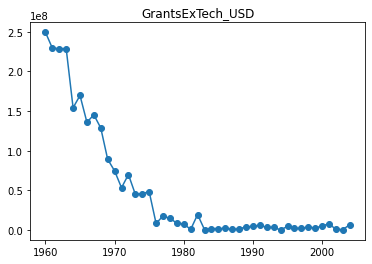

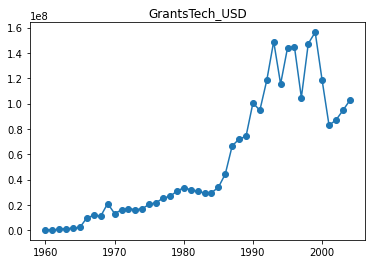

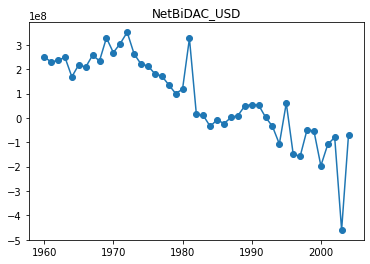

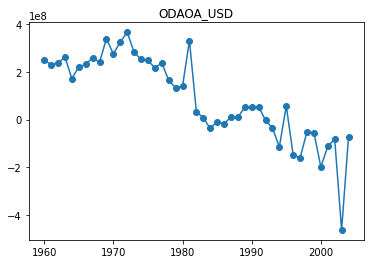

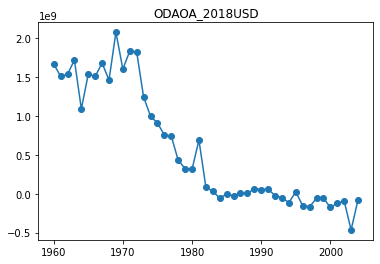

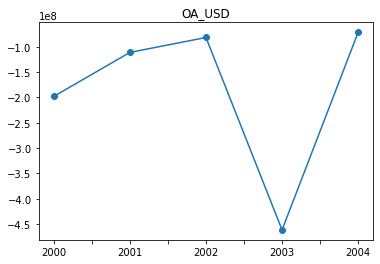

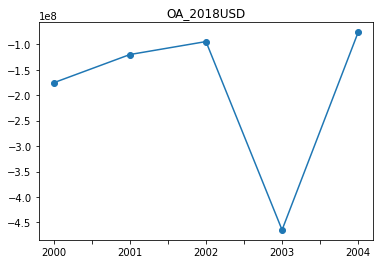

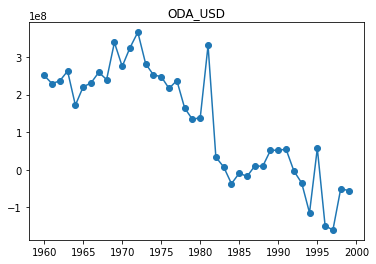

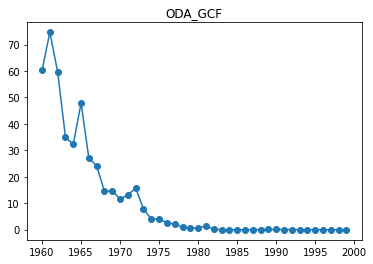

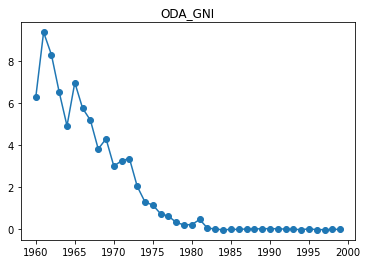

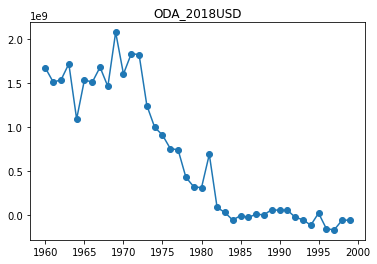

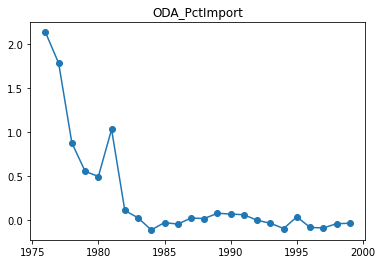

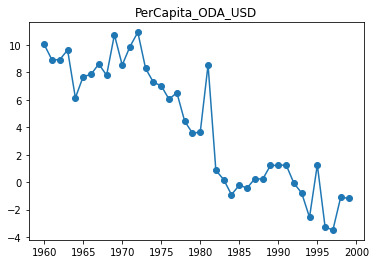

In [16]:
columns = list(tkorea_data.columns)
for col in columns[:13]:
    fig, ax = plt.subplots()
    tkorea_data[col].plot(ax=ax, title=col,marker = 'o')